In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pred_result_NN = pd.DataFrame()
for k in range(5):
    tmp = pd.read_csv('result_NN_{}.csv'.format(k))
    pred_result_NN[str(k)] = tmp.prediction
tmp = tmp.rename(columns = {'Unnamed: 0':'time'})
pred_result_NN.index = tmp.iloc[:,0]
pred_result_NN

,0,1,2,3,4
time,,,,,
2016-03-31 19:00:00,106.204910,40.983210,92.025070,113.641990,81.621956
2016-03-31 20:00:00,97.279500,39.474983,91.216440,110.477875,101.437225
2016-03-31 21:00:00,96.657180,38.631466,74.373440,106.026955,98.195450
2016-03-31 22:00:00,82.494650,39.044178,82.244225,91.594350,104.428360
2016-03-31 23:00:00,67.913400,39.925724,42.213943,65.680090,108.721980
...,...,...,...,...,...
2016-04-19 07:00:00,51.497692,44.827255,61.806240,51.266205,56.355110
2016-04-19 08:00:00,59.804350,45.591305,61.478767,50.484750,60.237946
2016-04-19 09:00:00,60.398396,44.678590,44.188484,44.397972,53.424423


In [3]:
pred_TB = pd.read_csv('pred_results_TB_1d.csv')
pred_TB = pred_TB.rename(columns = {'Unnamed: 0':'time'})
pred_TB = pred_TB.set_index('time')
pred_TB.columns = np.arange(5)
pred_TB

,0,1,2,3,4
time,,,,,
2016-01-29 00:00:00,39.424745,67.092384,35.226393,33.185135,67.687275
2016-01-29 01:00:00,35.769757,58.474206,33.364238,30.109373,82.749437
2016-01-29 02:00:00,35.858696,55.241249,37.741850,30.036588,79.980933
2016-01-29 03:00:00,35.667006,53.818578,37.226278,30.277725,75.172061
2016-01-29 04:00:00,36.481030,52.750357,42.993033,31.914015,90.579307
...,...,...,...,...,...
2016-04-19 19:00:00,84.747733,74.142823,55.040839,91.917610,55.120811
2016-04-19 20:00:00,83.497525,85.498620,52.459213,90.809001,54.259465
2016-04-19 21:00:00,78.415964,94.429089,48.269659,83.171105,68.103062


In [4]:
# align the date of the two prediction results
pred_TB = pred_TB[pred_TB.index >= '2016-03-31 19:00:00']
pred_TB = pred_TB[pred_TB.index <= '2016-04-19 10:00:00']
pred_TB

,0,1,2,3,4
time,,,,,
2016-03-31 19:00:00,85.707928,69.210342,67.118842,89.019512,68.343493
2016-03-31 20:00:00,83.205576,81.544481,62.572654,87.249663,65.031246
2016-03-31 21:00:00,78.531738,91.719984,58.830807,78.249044,67.717732
2016-03-31 22:00:00,66.652374,93.777508,50.092692,67.139695,78.846467
2016-03-31 23:00:00,53.103251,87.361507,39.258326,49.352498,64.641865
...,...,...,...,...,...
2016-04-19 06:00:00,41.017679,47.762873,49.700927,38.484256,32.273188
2016-04-19 07:00:00,53.642395,50.660074,62.153912,47.290729,42.132612
2016-04-19 08:00:00,60.538936,49.725961,52.986701,47.827177,51.022148


In [5]:
# calculate MAPE for tbats
dat_pred = pd.read_csv('dat_pred.csv')
dat_pred.set_index('label',inplace=True)
dat_pred

,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,2016-01-01 06:00:00,2016-01-01 07:00:00,2016-01-01 08:00:00,2016-01-01 09:00:00,...,2016-04-19 14:00:00,2016-04-19 15:00:00,2016-04-19 16:00:00,2016-04-19 17:00:00,2016-04-19 18:00:00,2016-04-19 19:00:00,2016-04-19 20:00:00,2016-04-19 21:00:00,2016-04-19 22:00:00,2016-04-19 23:00:00
label,,,,,,,,,,,,,,,,,,,,,
0,61.873220,49.990104,44.570139,41.803168,40.641710,42.821441,48.956424,52.547396,61.527604,72.449002,...,69.143273,75.656382,91.246292,111.260064,100.217029,97.945312,95.725106,86.971133,81.889831,59.005297
1,68.859574,57.966499,53.056144,52.190148,50.031250,48.941472,49.696041,47.935911,50.391155,56.842360,...,54.629541,48.239844,52.168750,69.911914,80.749023,81.361523,94.566602,98.646680,104.058008,92.462891
2,64.163450,71.818857,62.878906,61.840227,62.133502,69.336703,81.362439,101.130515,114.178615,110.524203,...,39.398026,35.428865,46.998355,40.039885,57.417352,74.376234,71.671053,65.210938,66.986020,36.548109
3,52.838661,42.563790,43.763188,38.996560,41.146466,38.483945,38.754408,44.410981,52.373280,54.531537,...,44.121277,47.579773,54.371826,69.906738,105.550293,114.797180,108.977539,110.336060,83.884888,65.273926
4,94.670573,85.461263,55.282878,44.813802,113.249674,111.484049,74.604818,71.102865,77.427572,98.029785,...,64.653764,62.509233,53.334517,49.213778,99.255682,97.951349,103.032315,85.398793,82.215199,63.832031


In [6]:
d_true = dat_pred.transpose()
d_true = d_true[d_true.index >= '2016-03-31 19:00:00']
d_true = d_true[d_true.index <= '2016-04-19 10:00:00']
d_true

label,0,1,2,3,4
2016-03-31 19:00:00,108.110325,102.804688,108.533565,128.151131,141.846571
2016-03-31 20:00:00,110.114231,99.892415,85.922454,132.911728,138.460938
2016-03-31 21:00:00,97.719911,112.901042,101.023148,118.487518,126.833116
2016-03-31 22:00:00,84.458720,109.189128,50.900174,88.402209,152.022135
2016-03-31 23:00:00,67.210410,100.988770,38.583044,61.695402,117.121962
...,...,...,...,...,...
2016-04-19 06:00:00,40.101430,41.312402,51.608964,40.709473,30.250355
2016-04-19 07:00:00,51.353019,57.247852,61.780839,49.435303,33.012784
2016-04-19 08:00:00,51.179820,49.335742,47.944490,44.951660,52.522017
2016-04-19 09:00:00,56.690479,46.394629,63.441201,37.019409,33.522372


In [7]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [8]:
mape_tb = []
for k in range(5):
    mape_tb.append(mape(d_true[k],pred_TB[k]))
mape_tb

[0.12234252386639748,
 0.14929239882914197,
 0.20234991633471594,
 0.14805742330785038,
 0.30118098495694223]

In [9]:
# overall MAPE for TBATS method
abs(d_true.values - pred_TB.values).sum() / d_true.values.sum()

0.17349706957906147

In [10]:
mape_NN = []
for k in range(5):
    mape_NN.append(mape(d_true[k],pred_result_NN.iloc[:-1,k]))
mape_NN

[0.07241472040574884,
 0.2764312260470489,
 0.17254294942362244,
 0.10289451449156552,
 0.3457366113771867]

In [11]:
abs(d_true.values - pred_result_NN.iloc[:-1,:].values).sum() /  d_true.values.sum()

0.1947509561758231

In [12]:
abs(d_true.values - pred_result_NN.iloc[:-1,:].values).sum()   

24195.89586386561

In [13]:
np.array(mape_tb)-np.array(mape_NN)

array([ 0.0499278 , -0.12713883,  0.02980697,  0.04516291, -0.04455563])

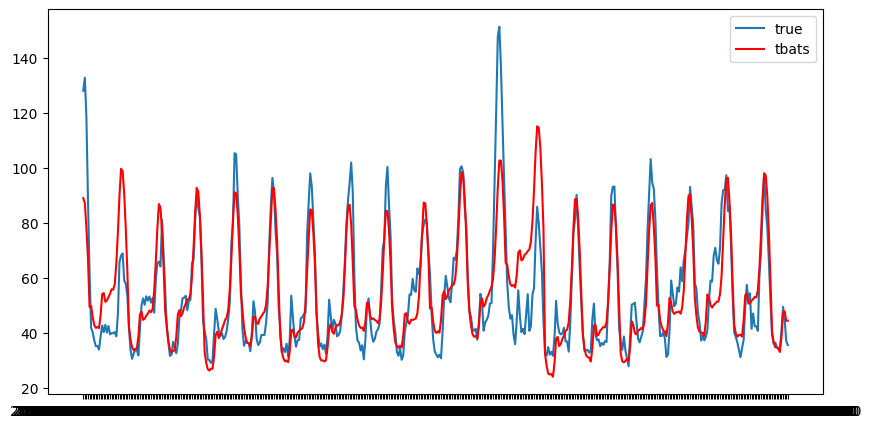

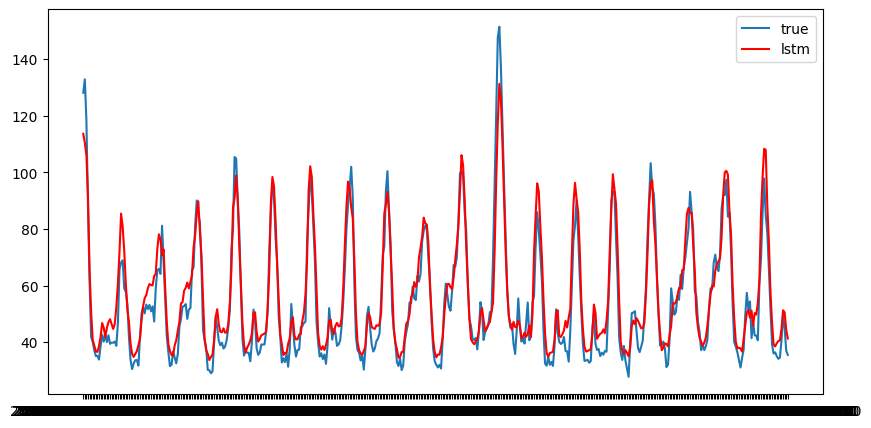

In [14]:
k = 3   # regular volatility. NN is good at capturing local fluctuations.

fig = plt.figure(figsize = (10,5))
plt.plot(d_true[k])
plt.plot(pred_TB[k],'r')
plt.legend(['true','tbats'])

fig = plt.figure(figsize = (10,5))
plt.plot(d_true[k])
plt.plot(pred_result_NN.iloc[:-1,k],'r')
plt.legend(['true','lstm'])

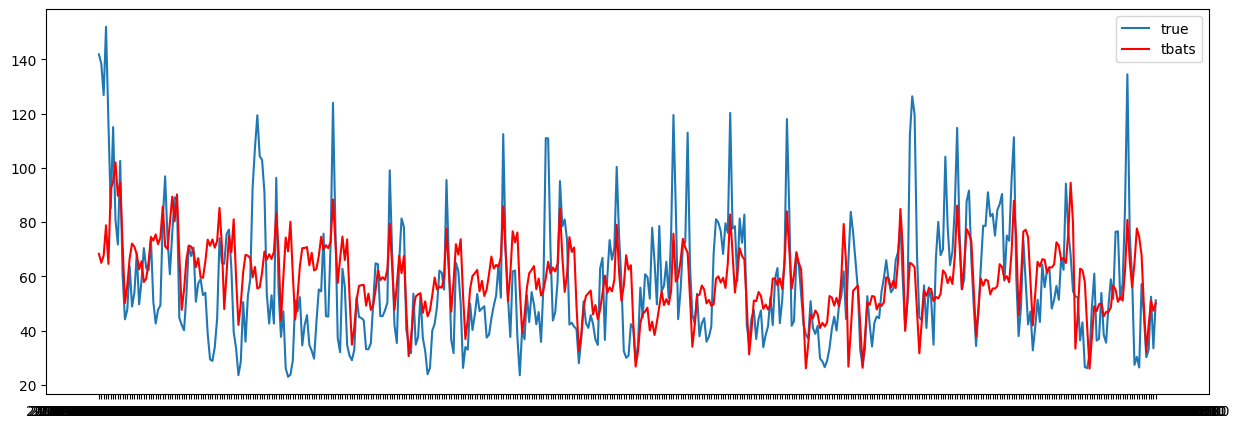

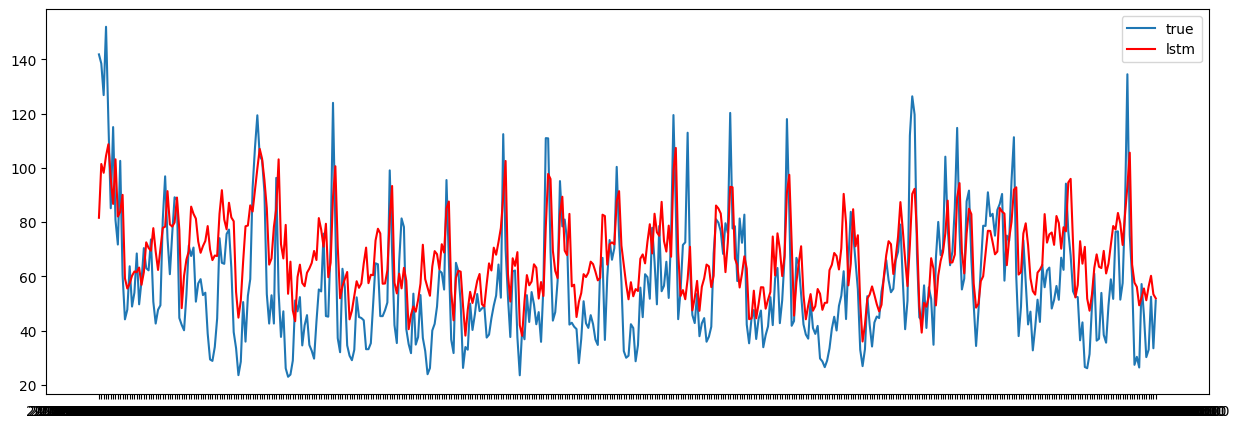

In [15]:
k = 4   # high volatility. TBATS outperforms NN and produces more stable forecast.

fig = plt.figure(figsize = (15,5))
plt.plot(d_true[k])
plt.plot(pred_TB[k],'r')
plt.legend(['true','tbats'])

fig = plt.figure(figsize = (15,5))
plt.plot(d_true[k])
plt.plot(pred_result_NN.iloc[:-1,k],'r')
plt.legend(['true','lstm'])